# Sinais periódicos

Neste notebook avaliaremos a série de Fourier de alguns sinais periódicos. 

Um sinal periódico, contínuo, é aquele para o qual a seguinte propriedade é válida:
    
\begin{equation}
x(t) = x(t \pm mT_p),
\end{equation}
ou seja, o valor do sinal no instante $t$ [s] é o mesmo para o instante $t \pm mT_p$ [s]. Dessa forma, o sinal se repete a cada
período $T_p$.

$T_p$ é o chamado período fundamental do sinal periódico. Neste caso, $x(t) = x(t \pm T_p) = x(t \pm 2T_p) = ... = x(t \pm kT_p)$.

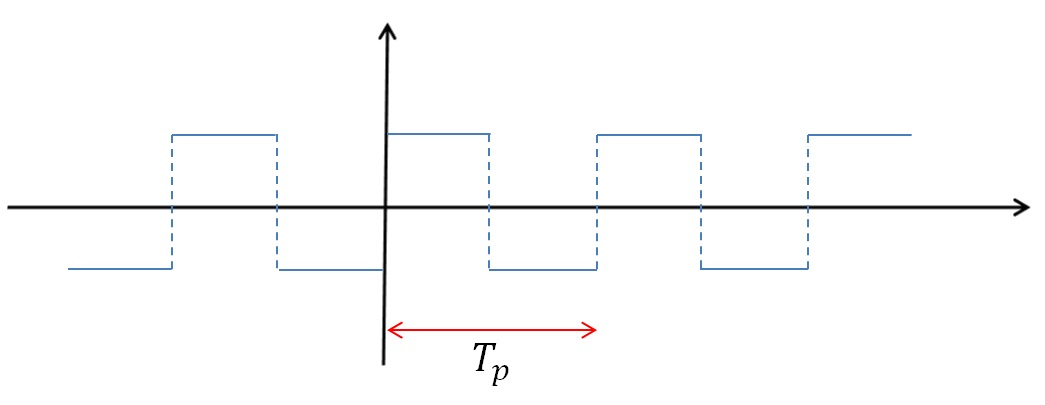

Os sinais periódicos tem uma frequência fundamental $f_1 = \frac{1}{T_p}$ (ou frequência angular fundamental $\omega_1 = \frac{2\pi}{T_p}$.


A base para a estimativa do espectro de tais sinais é a ***Série de Fourier***, que nos afirma que qualquer sinal periódico pode ser representado por uma soma infinita de senos e cossenos.

\begin{equation}
x(t) = \frac{a_0}{2} + \sum\limits_{k=1}^{\infty}a_k \mathrm{cos}(k \omega_1 t)+ \sum\limits_{k=1}^{\infty}b_k \mathrm{sin}(k \omega_1 t)
\end{equation}
com os coeficientes dados por:

\begin{equation}
\frac{a_0}{2} = \frac{1}{T_p}\int_{T_p} x(t)\mathrm{d}t
\end{equation}

\begin{equation}
a_k = \frac{2}{T_p}\int_{T_p} x(t)\mathrm{cos}(k\omega_1t)\mathrm{d}t
\end{equation}

\begin{equation}
b_k = \frac{2}{T_p}\int_{T_p} x(t)\mathrm{sin}(k\omega_1t)\mathrm{d}t
\end{equation}


Quando usamos a representação complexa da série de Fourier, temos:

\begin{equation}
x(t) = \sum\limits_{k=-\infty}^{\infty}\tilde{c}_k \mathrm{e}^{\mathrm{j}k \omega_1 t}
\end{equation}
com os coeficientes dados por:

\begin{equation}
\tilde{c}_k = \frac{1}{T_p}\int_{T_p} x(t)\mathrm{e}^{-\mathrm{j}k\omega_1 t}\mathrm{d}t
\end{equation}

Vamos investigar o espectro de uma onda quadrada e a recuperação do sinal $x(t)$ por meio do somatório de Fourier.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal # some signals

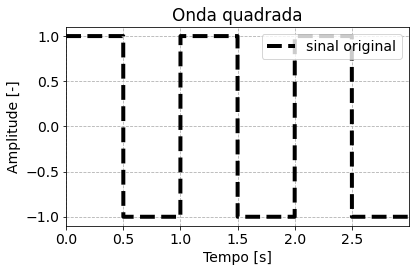

In [2]:
fs = 1000
t = np.arange(0, 3, 1/fs) # vetor temporal
f1 = 1 # Frequencia fundamental
w1 = 2*np.pi*f1

# onda quadrada
xt = signal.square(2 * np.pi * f1 * t)

# Figura
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, xt, '--k', linewidth = 4, label = 'sinal original')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, t[-1]))
plt.tight_layout()
plt.show()

# Os coeficientes de Fourier

In [12]:
max_k = 51 # valor máximo de harmônicas
k = np.arange(-max_k, max_k+1)
freq_vec = k*f1 # vetor de frequências (proporcional a f1)
ck = (-1j/(np.pi*k))*(1-np.cos(k*np.pi)) # coeficientes de Fourier
ck[(k%2)==0] = 0 # Para calcular com os arredondamentos corretos

C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


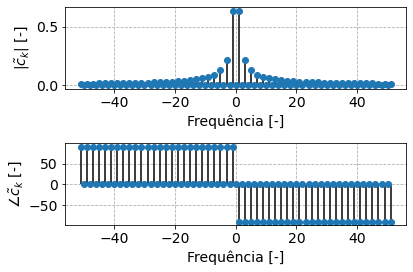

In [13]:
# O espectro
plt.figure()
plt.subplot(2,1,1)
plt.stem(freq_vec, np.abs(ck), '-k', basefmt=" ", use_line_collection=  True)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [-]')
plt.ylabel(r'$|\tilde{c}_k|$ [-]')
#plt.ylim((-2.2, 2.2))
plt.subplot(2,1,2)
plt.stem(freq_vec, np.rad2deg(np.angle(ck)), '-k', basefmt=" ", use_line_collection=  True)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [-]')
plt.ylabel(r'$\angle\tilde{c}_k$ [-]')
#plt.ylim((-2.2, 2.2))
plt.tight_layout()
plt.show()

# Reconstrução do sinal

In [14]:
# Construir uma matriz de sinais exponenciais complexos - cada linha é um "k"
xt_mtx = np.zeros((len(k), len(t)), dtype = complex)

for jk in np.arange(0,len(k)):
    xt_mtx[jk,:] = ck[jk]*np.exp(1j*k[jk]*w1*t)

xt_recon = np.sum(xt_mtx, axis = 0)

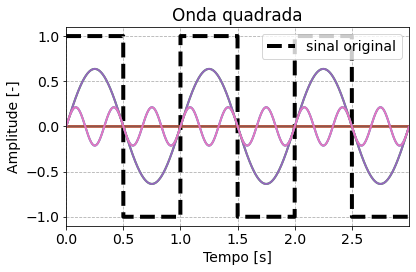

In [6]:
# Vamos plotar o sinal original e cada componente
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, xt, '--k', linewidth = 4, label = 'sinal original')
for jk in np.arange(0,len(k)):
    plt.plot(t, np.real(xt_mtx[jk,:]), linewidth = 2)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, t[-1]))
plt.tight_layout()
plt.show()

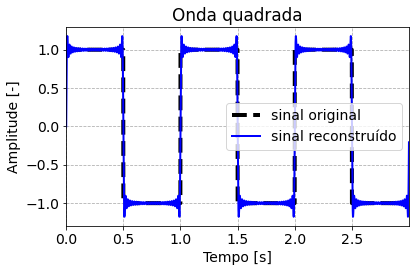

In [15]:
# Vamos plotar o sinal original e o reconstruído
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, xt, '--k', linewidth = 4, label = 'sinal original')
plt.plot(t, np.real(xt_recon), '-b', linewidth = 2, label = 'sinal reconstruído')
plt.legend(loc = 'center right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, t[-1]))
plt.tight_layout()
plt.show()